In [252]:
import pandas as pd
import copy

In [50]:
token = pd.read_csv('data/ssodam2021_tokenized.csv')
token

num board                             title  \
0      1082901   익게2                             해피뉴이어   
1      1082902   익게2                  2021년 새해복 많이받으세요   
2      1082903   익게2                            첫글은 내꼬   
3      1082905   익게2                          땡ㅎㅎㅎㅎㅎㅎㅎ   
4      1082906   익게2                 어디 카운트 다운 하는 곳 없냐   
...        ...   ...                               ...   
77975  1200285   익게2  아버지께서 칼럼 쓰셨는데 댓글 한 번씩만 달아줄 수 있을까   
77976  1200287   익게2                    프로포폴 하면 기분이 좋음   
77977  1200288   익게2                 취업 후기 쓰려는데 안올라간다ㅠ   
77978  1200291   익게2                     간떨어지는동거 보는 사람   
77979  1200293   익게2                       오타루 오마카세 후기   

                                                    text writer upload_date  \
0                                   2021년은 모두 행복한 한해가 되길     익명  2021/01/01   
1                                      모든 일이 잘 되기를 12시 땡     익명  2021/01/01   
2                                              예비회계사 나다미     익명  2021/01/01   
3                                                     1등     익명  2021/01/01   
4                                                   언제바껴     익명  2021/01/01   
...                                                  ...    ...         ...   
77975  2222408544049우리 아버지께서 이번에 짧은 칼럼처럼 블로그에 쓰시는 거 맡...     익명  2021/06/30   
77976                              하는거 신기하네하면 힙해보여서 하는건가     익명  2021/06/30   
77977  손다쳐서 폰으로 열심히 적었는데나한테왜 이래ㅠ혹시 뭔가 지켜야 하는 양식이 있나요ㅠ...     익명  2021/06/30   
77978  아 이번주 기대했는데                                예고편...     익명  2021/06/30   
77979  전에 어떤 다미가 추천한거 보고 오늘 가봤어ㅎㅎ디너 오마카세 가격은 55,000원이...     익명  2021/06/30   

      upload_time    view  likes  dislikes  \
0           00:00  1343.0  195.0       0.0   
1           00:00   107.0    3.0       0.0   
2           00:00   139.0    1.0       0.0   
3           00:00    39.0    0.0       0.0   
4           00:00    84.0    0.0       0.0   
...           ...     ...    ...       ...   
77975       23:43  5802.0  374.0      11.0   
77976       23:47   373.0    1.0       1.0   
77977       23:49   387.0    3.0       0.0   
77978       23:55   138.0    6.0       0.0   
77979       23:59   869.0   24.0       0.0   

                                                comments  \
0      앗, 성지다, 첫글 ㅊㅊ, 추천 준다, 내 24살은 인생에서 가장 빛나는 날로 만들...   
1                                                    늦었네   
2                                         ㄹㅇ 1등이네 ㅋㅋ, 실패   
3                                                    NaN   
4                                              232번 불교방송   
...                                                  ...   
77975  비댓으로 달래 너무 귀엽다, 이 글 조회수 늘리려면 제목 바꾸는거 추천 광고글인줄 ...   
77976  썰로 들은 거라 정확하지는 않는데 지방흡입할 때 고통 줄이려고 프로포폴 투약하다가 ...   
77977  중간에 임티 넣었었어, 임티, 1 이모티콘 빼기2 사진 많으면 업로드 될 동안 조금...   
77978  너무 오글거리는데 장기용때매 봄 ㅎㅎ, 난 계선우땜에 봐ㅠㅠ, 나도 계선우 때문에 ...   
77979  맛있겠다, 김을 안 주는게 아쉽다, 너무 괜찮은데 와 나도 가보고싶다지방다미, 와 ...   

                                         comments_writer  comments_cnt  \
0                                                    NaN          20.0   
1                                       2빠다 ㅎㅎ, 내년에 도전한다           3.0   
2                                                     ㅜㅜ           3.0   
3                                                    NaN           0.0   
4                                                    NaN           1.0   
...                                                  ...           ...   
77975  헉 피드백 반영했어 너무 고마워, 엇 아마 확인은 못하실 텐데 비댓이든 공개댓이든 ...          75.0   
77976                                                NaN           5.0   
77977                                              이건 되네           7.0   
77978                                                NaN           3.0   
77979  존맛 꼭가봐ㅎㅎ, 아무래도 가격이 가격인지라 전반적으로 딱 기본에 충실한 느낌이긴 ...          16.0   

                                          text_tokenized  \
0      [('2021년', 'Number'), ('은', 'Foreign'), ('모두',...   
1      [('모든', 'Noun'), ('일이', 'Modifier'), ('잘', 'Ve...   
2      [('예비', 'Noun')

In [51]:
import pickle
with open('data/all_tokenized_list.pkl', 'rb') as f:
    all_tokenized = pickle.load(f)

In [4]:
all_tokenized

[["('2021년', 'Number')",
  "('은', 'Foreign')",
  "('모두', 'Noun')",
  "('행복한', 'Adjective')",
  "('한해', 'Noun')",
  "('가', 'Josa')",
  "('되길', 'Verb')",
  "('해피뉴이어', 'Noun')",
  "('앗', 'Noun')",
  "(',', 'Punctuation')",
  "('성지', 'Noun')",
  "('다', 'Josa')",
  "(',', 'Punctuation')",
  "('첫', 'Modifier')",
  "('글', 'Noun')",
  "('ㅊㅊ', 'KoreanParticle')",
  "(',', 'Punctuation')",
  "('추천', 'Noun')",
  "('준다', 'Verb')",
  "(',', 'Punctuation')",
  "('내', 'Noun')",
  "('24', 'Number')",
  "('살', 'Noun')",
  "('은', 'Josa')",
  "('인생', 'Noun')",
  "('에서', 'Josa')",
  "('가장', 'Noun')",
  "('빛나는', 'Verb')",
  "('날로', 'Noun')",
  "('만들꺼야', 'Verb')",
  "('ㅎㅎ', 'KoreanParticle')",
  "(',', 'Punctuation')",
  "('ㅊㅊ', 'KoreanParticle')",
  "(',', 'Punctuation')",
  "('니', 'Noun')",
  "('가', 'Josa')",
  "('승자', 'Noun')",
  "('냐', 'Josa')",
  "(',', 'Punctuation')",
  "('올', 'Verb')",
  "('한', 'Verb')",
  "('해', 'Noun')",
  "('좋은', 'Adjective')",
  "('일만', 'Noun')",
  "('가득하게', 'Adjective')",
  "('

In [5]:
noun_tokenized = []

for i in range(len(all_tokenized)):
    noun_list = []
    for j in range(len(all_tokenized[i])):
        if 'Noun' in all_tokenized[i][j]:
            noun_list.append(all_tokenized[i][j])
    noun_tokenized.append(noun_list)

noun_tokenized

[["('모두', 'Noun')",
  "('한해', 'Noun')",
  "('해피뉴이어', 'Noun')",
  "('앗', 'Noun')",
  "('성지', 'Noun')",
  "('글', 'Noun')",
  "('추천', 'Noun')",
  "('내', 'Noun')",
  "('살', 'Noun')",
  "('인생', 'Noun')",
  "('가장', 'Noun')",
  "('날로', 'Noun')",
  "('니', 'Noun')",
  "('승자', 'Noun')",
  "('해', 'Noun')",
  "('일만', 'Noun')",
  "('선택', 'Noun')",
  "('자', 'Noun')",
  "('한해', 'Noun')",
  "('기도', 'Noun')",
  "('거', 'Noun')",
  "('진짜', 'Noun')",
  "('아아', 'Noun')",
  "('아아', 'Noun')",
  "('어', 'Noun')",
  "('올해', 'Noun')",
  "('학점', 'Noun')",
  "('취업', 'Noun')",
  "('로또', 'Noun')",
  "('자정', 'Noun')",
  "('글', 'Noun')",
  "('거', 'Noun')",
  "('생각', 'Noun')",
  "('웰케', 'Noun')",
  "('다미', 'Noun')",
  "('해피', 'Noun')",
  "('뉴', 'Noun')",
  "('글', 'Noun')",
  "('운', 'Noun')",
  "('나', 'Noun')",
  "('빠', 'Noun')",
  "('합격', 'Noun')",
  "('합격', 'Noun')",
  "('하자', 'Noun')",
  "('내', 'Noun')",
  "('거', 'Noun')",
  "('수', 'Noun')"],
 ["('모든', 'Noun')",
  "('땡', 'Noun')",
  "('새해', 'Noun')",
  "('복', 'Noun')

In [6]:
import pickle

with open("data/2nd_10bow.pkl","rb") as fr:
    bow_10 = pickle.load(fr)
print(bow_10)

     keyword  count
0         배려      1
1         룸메      1
2         생리      3
3        헬스장      1
4         조언      1
...      ...    ...
1179      사기      1
1180       덱      1
1181      김씨      1
1182     십일조      1
1183     유희왕      1

[1184 rows x 2 columns]


In [7]:
import pickle

with open("data/2nd_20bow.pkl","rb") as fr:
    bow_20 = pickle.load(fr)
print(bow_20)

     keyword  count
0         선택      3
1          얘      1
2         배려      2
3         경험      1
4         룸메      1
...      ...    ...
1907      존중      1
1908      김씨      1
1909     종교인      1
1910     십일조      1
1911     유희왕      1

[1912 rows x 2 columns]


In [8]:
bow_10 = bow_10.sort_values('count', ascending = False)
bow_10

keyword  count
114       연애      8
420       외모      8
17       변호사      8
69        문과      8
577       아빠      7
...      ...    ...
536       유예      1
537       처리      1
538       그램      1
539       상응      1
1183     유희왕      1

[1184 rows x 2 columns]

In [9]:
bow_20 = bow_20.sort_values('count', ascending = False)
bow_20

keyword  count
35       변호사     14
178       결혼     13
137       문과     12
40        휴학     12
271       아빠     12
...      ...    ...
305      가치관      1
308      사랑니      1
309       치과      1
1046      독도      1
1911     유희왕      1

[1912 rows x 2 columns]

In [ ]:
## 추가적으로 찾아보는 것
def search_cd(word, x):
    try:
        return True if word in [y[0] for y in x] else False
    except:
        return False

def s_search(word, month, show_urls=True):
    df_month = df2[df2.upload_date.apply(lambda x: True if x.month==month else False)]
    title_cd = df2.title_tokenized.apply(lambda x: search_cd(word,x))
    text_cd = df2.text_tokenized.apply(lambda x: search_cd(word,x))
    comments_cd = df2.comments_tokenized.apply(lambda x: search_cd(word,x))
    comments_writer_cd = df2.comments_writer_tokenized.apply(lambda x: search_cd(word,x))
    df = df_month[title_cd | text_cd | comments_cd | comments_writer_cd]
    if show_urls==True:
        [print('http://www.ssodam.com/content/'+str(number)) for number in df.num]
    return df

## 떡밥 구체화

### bow 생성

In [17]:
a = list(bow_10['keyword'])
a

['연애',
 '외모',
 '변호사',
 '문과',
 '아빠',
 '일본',
 '의사',
 '의대',
 '대출',
 '중국',
 '휴학',
 '동아리',
 '동생',
 '세대',
 '헌혈',
 '냉동',
 '고양이',
 '논문',
 '정치',
 '생일',
 '조교',
 '과외',
 '이과',
 '교회',
 '대면',
 '애플',
 '투표',
 '경제학',
 '언니',
 '삼성',
 '수술',
 '할머니',
 '오빠',
 '검사',
 '수능',
 '리트',
 '학부',
 '소득',
 '피자',
 '백신',
 '정원',
 '예수회',
 '서울대',
 '진이뽀',
 '장학금',
 '공대',
 '선수',
 '로욜라',
 '마스크',
 '학벌',
 '씨',
 '아파트',
 '총장',
 '강아지',
 '족보',
 '학생회',
 '커뮤',
 '자랑',
 '가슴',
 '경찰',
 '방송',
 '부동산',
 '세금',
 '커서',
 '계절',
 '폰',
 '전기',
 '피해자',
 '상담',
 '토트넘',
 '누나',
 '카드',
 '키',
 '면접',
 '채용',
 '여친',
 '녹강',
 '회식',
 '선임',
 '이미지',
 '아버지',
 '코인',
 '가격',
 '여자친구',
 '진자',
 '병원',
 '경영',
 '수사',
 '중국인',
 '보험',
 '대체',
 '유통',
 '기성용',
 '국어',
 '경영학',
 '언어',
 '강남',
 '표현',
 '입결',
 '자리',
 '피부',
 '특',
 '냄새',
 '정신',
 '학번',
 '대학원',
 '휴가',
 '전화',
 '능력',
 '복전',
 '결혼',
 '발',
 '인턴',
 '커피',
 '부모님',
 '법인',
 '인간',
 '카페',
 '시장',
 '학회',
 '담배',
 '축하',
 '철학',
 '군인',
 '곡',
 '가족',
 '학폭',
 '경제',
 '수강신청',
 '시위',
 '팬',
 '영상',
 '졸업',
 '화장실',
 '필기',
 '생리',
 '폐강',
 '공익',
 '금시',
 '합격'

In [18]:
b = list(bow_20['keyword'])
b

['변호사',
 '결혼',
 '문과',
 '휴학',
 '아빠',
 '외모',
 '동생',
 '연애',
 '미국',
 '팬',
 '중국',
 '학부',
 '일본',
 '총장',
 '곡',
 '병원',
 '수능',
 '조교',
 '대면',
 '철학',
 '경찰',
 '고양이',
 '복전',
 '합격',
 '세대',
 '애플',
 '동아리',
 '사건',
 '공대',
 '이과',
 '담배',
 '공감',
 '경제학',
 '논문',
 '수술',
 '주식',
 '카페',
 '축하',
 '언니',
 '의사',
 '족보',
 '방송',
 '키',
 '부모님',
 '오빠',
 '형',
 '폰',
 '선배',
 '부동산',
 '코인',
 '경영',
 '입결',
 '운동',
 '백신',
 '로욜라',
 '서울대',
 '시장',
 '자랑',
 '게임',
 '알바',
 '투표',
 '비대',
 '헌혈',
 '냉동',
 '자리',
 '학년',
 '선물',
 '피해자',
 '술',
 '정원',
 '마스크',
 '의대',
 '몸',
 '학번',
 '사장',
 '휴가',
 '전화',
 '가격',
 '할머니',
 '로스쿨',
 '리트',
 '대학원',
 '신고',
 '소득',
 '경제',
 '과외',
 '영화',
 '학벌',
 '선수',
 '대출',
 '생일',
 '능력',
 '욕',
 '커뮤',
 '학회',
 '서울',
 '수학',
 '삼성',
 '검사',
 '학원',
 '책',
 '치킨',
 '아파트',
 '이름',
 '박사',
 '진자',
 '보험',
 '학생회',
 '장학금',
 '연구',
 '옷',
 '정치',
 '상담',
 '피자',
 '취업',
 '예수회',
 '커서',
 '진이뽀',
 '팀',
 '아버지',
 '피부',
 '인간',
 '영상',
 '수강신청',
 '머리',
 '감독',
 '지방',
 '점수',
 '차',
 '새내기',
 '노력',
 '누나',
 '계절',
 '씨',
 '메일',
 '지역',
 '단어',
 '교회',
 '필기',
 '공무원',
 '회사',
 '화

In [24]:
for i in range(len(a)):
    if a[i] not in b:
        print('bow_10의 keyword는 bow_20의 keyword에 다 포함되지 않는다.')
        break
print('끝') ## bow_10의 keyword는 bow_20의 keyword에 다 포함된다.

끝


In [27]:
bow = bow_20.copy()
bow['count'] = bow['count']*0.5

for i in range(len(bow)):
    for j in range(len(bow_10)):
        if bow['keyword'].loc[i] == bow_10['keyword'].loc[j]:
            bow['count'].loc[i] += bow_10['count'].loc[j]
            

bow = bow.sort_values('count', ascending = False)            
bow

C:\Users\edr2\anaconda3\envs\edu\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


keyword  count
35       변호사   15.0
137       문과   14.0
70        외모   14.0
220       연애   13.5
271       아빠   13.0
...      ...    ...
902        정    0.5
193     메인보드    0.5
1297     라이트    0.5
380       성적    0.5
1350      해석    0.5

[1912 rows x 2 columns]

In [28]:
bow_keyword = list(bow['keyword'])
bow_keyword

['변호사',
 '문과',
 '외모',
 '연애',
 '아빠',
 '휴학',
 '동생',
 '일본',
 '중국',
 '의사',
 '고양이',
 '학부',
 '논문',
 '동아리',
 '세대',
 '대면',
 '결혼',
 '수능',
 '조교',
 '수술',
 '경제학',
 '이과',
 '애플',
 '의대',
 '헌혈',
 '냉동',
 '언니',
 '대출',
 '총장',
 '경찰',
 '오빠',
 '투표',
 '삼성',
 '검사',
 '생일',
 '과외',
 '족보',
 '리트',
 '할머니',
 '공대',
 '팬',
 '복전',
 '합격',
 '병원',
 '자랑',
 '곡',
 '서울대',
 '로욜라',
 '백신',
 '정치',
 '부동산',
 '폰',
 '교회',
 '미국',
 '방송',
 '철학',
 '학벌',
 '피해자',
 '선수',
 '정원',
 '마스크',
 '소득',
 '아파트',
 '커뮤',
 '카페',
 '담배',
 '축하',
 '씨',
 '학생회',
 '장학금',
 '상담',
 '피자',
 '예수회',
 '커서',
 '진이뽀',
 '계절',
 '시장',
 '키',
 '부모님',
 '코인',
 '경영',
 '입결',
 '전기',
 '공감',
 '주식',
 '강아지',
 '가격',
 '학회',
 '능력',
 '전화',
 '자리',
 '경제',
 '학번',
 '대학원',
 '가슴',
 '선물',
 '세금',
 '휴가',
 '수강신청',
 '영상',
 '필기',
 '피부',
 '아버지',
 '형',
 '선배',
 '메일',
 '인간',
 '누나',
 '진자',
 '비대',
 '알바',
 '게임',
 '보험',
 '선임',
 '정신',
 '생리',
 '커피',
 '인턴',
 '여자친구',
 '발',
 '국어',
 '가족',
 '언어',
 '표현',
 '군인',
 '자살',
 '졸업',
 '경영학',
 '카드',
 '범죄',
 '책',
 '학원',
 '신고',
 '로스쿨',
 '술',
 '사장',
 '노력',
 '강남',
 '이름',
 '면접',
 '폐강

In [31]:
bow_keyword_noun = []
for i in range(len(bow_keyword)):
    bow_keyword_noun.append("('" + bow_keyword[i] +"', 'Noun')")
    
bow_keyword_noun

["('변호사', 'Noun')",
 "('문과', 'Noun')",
 "('외모', 'Noun')",
 "('연애', 'Noun')",
 "('아빠', 'Noun')",
 "('휴학', 'Noun')",
 "('동생', 'Noun')",
 "('일본', 'Noun')",
 "('중국', 'Noun')",
 "('의사', 'Noun')",
 "('고양이', 'Noun')",
 "('학부', 'Noun')",
 "('논문', 'Noun')",
 "('동아리', 'Noun')",
 "('세대', 'Noun')",
 "('대면', 'Noun')",
 "('결혼', 'Noun')",
 "('수능', 'Noun')",
 "('조교', 'Noun')",
 "('수술', 'Noun')",
 "('경제학', 'Noun')",
 "('이과', 'Noun')",
 "('애플', 'Noun')",
 "('의대', 'Noun')",
 "('헌혈', 'Noun')",
 "('냉동', 'Noun')",
 "('언니', 'Noun')",
 "('대출', 'Noun')",
 "('총장', 'Noun')",
 "('경찰', 'Noun')",
 "('오빠', 'Noun')",
 "('투표', 'Noun')",
 "('삼성', 'Noun')",
 "('검사', 'Noun')",
 "('생일', 'Noun')",
 "('과외', 'Noun')",
 "('족보', 'Noun')",
 "('리트', 'Noun')",
 "('할머니', 'Noun')",
 "('공대', 'Noun')",
 "('팬', 'Noun')",
 "('복전', 'Noun')",
 "('합격', 'Noun')",
 "('병원', 'Noun')",
 "('자랑', 'Noun')",
 "('곡', 'Noun')",
 "('서울대', 'Noun')",
 "('로욜라', 'Noun')",
 "('백신', 'Noun')",
 "('정치', 'Noun')",
 "('부동산', 'Noun')",
 "('폰', 'Noun')",
 "('교회'

### Word2Vec

In [11]:
from gensim.models import Word2Vec
model_n = Word2Vec(sentences = noun_tokenized, size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

'''
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).
'''

'\nsize = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.\nwindow = 컨텍스트 윈도우 크기\nmin_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)\nworkers = 학습을 위한 프로세스 수\nsg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).\n'

In [12]:
from gensim.models import Word2Vec
model_a = Word2Vec(sentences = all_tokenized, size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

'''
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).
'''

'\nsize = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.\nwindow = 컨텍스트 윈도우 크기\nmin_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)\nworkers = 학습을 위한 프로세스 수\nsg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).\n'

In [72]:
word_vectors = model_a.wv
vocabs = bow_keyword_noun[:100]
word_vectors_list = [word_vectors[v] for v in vocabs]
word_vectors_list

[array([ 0.4487979 ,  0.2929391 ,  0.07340225, -0.13441037,  0.47814837,
         0.07840288, -0.4704867 ,  0.00238771,  0.5910345 ,  0.2882183 ,
         0.31553298, -0.16832702, -0.27695754,  0.044744  , -0.56867254,
         0.59231406, -0.15488906, -0.36433572, -0.3075323 ,  0.06304421,
        -0.14235377,  0.4523854 , -0.18274438,  0.29498246, -0.0881498 ,
        -0.03517038,  0.11102472,  0.6602655 ,  0.3311856 ,  0.08753805,
         0.45564604,  0.26265115, -0.01395753,  0.571065  , -0.22688885,
         0.25143993, -0.10708043, -0.6562473 , -0.03383468,  0.19372886,
         0.07678761,  0.58369225,  0.08967305, -0.03408279, -0.39637348,
        -0.24677251, -0.23384373, -0.42397904, -0.20751007, -0.17923343,
        -0.12240955, -0.06133947,  0.01078551, -0.08174209,  0.02989361,
         0.10247755,  0.39349625, -0.00533463, -0.24452558,  0.00872187,
        -0.26705176,  0.39824197, -0.37180966,  0.2691867 ,  0.3194705 ,
        -0.00359663, -0.32406804, -0.07201494, -0.5

In [73]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))


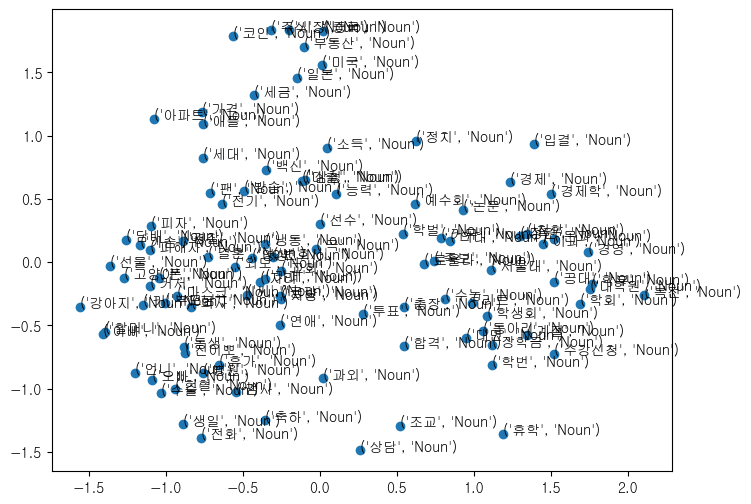

In [76]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

plt.rcParams['font.family'] = 'Gulim'
 
# 결과2
plot_2d_graph(vocabs, xs, ys)
plt.show()
## 처음부터 100개

---

#### 다린 방법

In [83]:
similarity_75_list = []

for i in range(len(bow_keyword)):
    sim_keyword_list = [bow_keyword[i]]
    
    for j in range(i+1,len(bow_keyword)):
        if model_n.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')") >= 0.75:
            sim_keyword_list.append(bow_keyword[j])
            
    if len(sim_keyword_list) == 1:
        pass
    else:
        similarity_75_list.append(sim_keyword_list)
    
similarity_75_list
# Noun으로 모델 

[['변호사', '회계사'],
 ['문과', '이과', '문이과'],
 ['연애', '짝사랑'],
 ['아빠', '동생', '부모님', '어머니', '엄마', '엄니'],
 ['휴학', '복학'],
 ['동생', '언니', '엄마'],
 ['일본', '중국'],
 ['고양이', '강아지', '길고양이'],
 ['동아리', '연합'],
 ['대면', '비대'],
 ['결혼', '이혼', '비혼'],
 ['수능', '국어'],
 ['수술', '병원'],
 ['경제학', '미시'],
 ['이과', '입결', '문이과', '한의대'],
 ['의대', '서울대', '약대', '한의대'],
 ['헌혈', '혈소판', '백혈구'],
 ['언니', '오빠', '누나'],
 ['대출', '전세'],
 ['총장', '이사회'],
 ['경찰', '수사', '목격자'],
 ['오빠', '누나'],
 ['삼성', '엘지'],
 ['할머니', '할아버지', '엄니'],
 ['복전', '컴공', '전공'],
 ['합격', '합격자'],
 ['병원', '대학병원', '치과', '내시경'],
 ['곡', '앨범', '노래'],
 ['서울대', '중앙대', '서성', '스탠포드', '충북대', '성균관대', '고려대', '연대', '카이스트', '과고', '한양대'],
 ['로욜라', '도서관'],
 ['백신', '접종'],
 ['폰', '아이폰', '휴대폰'],
 ['교회', '기독교'],
 ['피해자', '가해자', '김정현', '추행'],
 ['씨', '파생'],
 ['학생회', '선거운동'],
 ['예수회', '재단'],
 ['계절', '재수강'],
 ['부모님', '어머니', '엄마', '부모', '엄니'],
 ['코인', '주식', '비트코인'],
 ['경영', '경영학'],
 ['입결', '서성', '빵꾸', '문이과'],
 ['주식', '수익률'],
 ['학번', '새내기'],
 ['대학원', '진학', '석사'],
 ['세금', '탈세'],
 ['피부', '여드름'],
 ['

In [253]:
similarity_75_list_a = []

for i in range(len(bow_keyword)):
    sim_keyword_list = [bow_keyword[i]]
    
    for j in range(i+1,len(bow_keyword)):
        if model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')") >= 0.75:
            sim_keyword_list.append(bow_keyword[j])
            
    if len(sim_keyword_list) == 1:
        pass
    else:
        similarity_75_list_a.append(sim_keyword_list)
    
similarity_75_list_a
# all_tokenized으로 모델

[['변호사', '약사', '회계사'],
 ['문과', '이과', '공대', '서울대', '정시', '약대', '과고'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할머니', '아버지', '어머니', '할아버지', '엄마', '엄니'],
 ['휴학', '복학'],
 ['동생', '언니', '엄마'],
 ['일본', '중국', '미국', '한국', '우리나라', '유럽'],
 ['중국', '미국', '한국', '우리나라', '유럽', '대만'],
 ['고양이', '강아지'],
 ['학부', '공대', '대학원', '인문'],
 ['동아리', '학회', '연합', '활동'],
 ['대면', '비대', '전면'],
 ['결혼', '이혼'],
 ['수능', '국어'],
 ['경제학', '경영학', '원론'],
 ['이과', '공대', '서울대', '성대', '문이과', '과고', '한양대'],
 ['애플', '갤럭시', '버즈', '워치'],
 ['의대', '서울대', '로스쿨', '성대', '중앙대', '약대', '연대', '카이스트', '한의대'],
 ['헌혈', '혈소판', '백혈구'],
 ['언니', '오빠', '누나'],
 ['대출', '전세'],
 ['총장', '이사회'],
 ['경찰', '검찰', '영장'],
 ['오빠', '누나'],
 ['삼성', '엘지'],
 ['할머니', '부모님', '아버지', '어머니', '할아버지', '엄마', '삼촌', '엄니'],
 ['공대', '서울대', '대학원', '컴공', '인문', '과고'],
 ['복전', '컴공', '재수강', '복수', '전공'],
 ['병원', '대학병원', '치과'],
 ['곡', '앨범', '노래'],
 ['서울대',
  '로스쿨',
  '성대',
  '중대',
  '중앙대',
  '연고',
  '스탠포드',
  '한양',
  '포스텍',
  '충북대',
  '외고',
  '성균관대',
  '고려대',
  '약대',
  '연대',
  '충남대',


In [254]:
print(model_a.wv.similarity(w1="('변호사', 'Noun')", w2="('약사', 'Noun')"))

0.8163171


In [100]:
for i in range(len(similarity_75_list)):
    if '약사' in similarity_75_list[i]:
        print(i)

0
100


In [127]:
similarity_75_list_a[0]

['변호사', '약사', '회계사']

In [128]:
similarity_75_list_a[8][0] in similarity_75_list_a[7]

True

In [256]:
similarity_75_list_a1 = copy.deepcopy(similarity_75_list_a)
new_list = []
in_list = []

for i in reversed(range(len(similarity_75_list_a1))):
    for k in range(i):
        if similarity_75_list_a1[i][0] in similarity_75_list_a1[k]:
            similarity_75_list_a1[k] = similarity_75_list_a1[k] + similarity_75_list_a1[i]
            print(i, '&', similarity_75_list_a1[i][0], '&', k)
            
            
            new_list.append(k) # 새로 합쳐지는 메인 리스트 번호
            in_list.append(i) # 들어가지는 리스트 번호
            

388 & 현아 & 341
388 & 현아 & 343
388 & 현아 & 383
387 & 불완전 & 276
387 & 불완전 & 292
387 & 불완전 & 314
387 & 불완전 & 315
387 & 불완전 & 319
387 & 불완전 & 386
386 & 곤충 & 297
386 & 곤충 & 319
385 & 자료구조 & 317
385 & 자료구조 & 382
384 & 로그인 & 337
383 & 리바이 & 219
383 & 리바이 & 248
383 & 리바이 & 368
381 & 게놈 & 319
380 & 스웨덴 & 229
380 & 스웨덴 & 331
380 & 스웨덴 & 350
379 & 샌드위치 & 152
379 & 샌드위치 & 240
379 & 샌드위치 & 246
379 & 샌드위치 & 329
379 & 샌드위치 & 347
379 & 샌드위치 & 366
377 & 교화 & 232
377 & 교화 & 236
377 & 교화 & 253
377 & 교화 & 256
377 & 교화 & 268
377 & 교화 & 274
377 & 교화 & 361
377 & 교화 & 367
376 & 옐피 & 347
376 & 옐피 & 359
375 & 명연 & 278
375 & 명연 & 300
375 & 명연 & 301
375 & 명연 & 353
374 & 복수 & 28
373 & 여드름 & 52
373 & 여드름 & 330
372 & 과고 & 1
372 & 과고 & 16
372 & 과고 & 27
372 & 과고 & 31
372 & 과고 & 289
372 & 과고 & 294
372 & 과고 & 362
371 & 허벅지 & 139
371 & 허벅지 & 196
371 & 허벅지 & 328
371 & 허벅지 & 358
370 & 시립대 & 31
370 & 시립대 & 98
370 & 시립대 & 132
370 & 시립대 & 301
370 & 시립대 & 313
370 & 시립대 & 353
369 & 조선족 & 78
369 & 조선족 & 216
368 & 코다리 & 248
368 & 

In [257]:
similarity_75_list_a1

[['변호사',
  '약사',
  '회계사',
  '회계사',
  '전문직',
  '변리사',
  '전문직',
  '개업',
  '약사',
  '회계사',
  '전문직',
  '전문직',
  '개업',
  '회계사',
  '전문직',
  '변리사',
  '전문직',
  '개업'],
 ['문과',
  '이과',
  '공대',
  '서울대',
  '정시',
  '약대',
  '과고',
  '과고',
  '신학',
  '약대',
  '한의대',
  '서울대',
  '로스쿨',
  '성대',
  '중대',
  '중앙대',
  '연고',
  '스탠포드',
  '한양',
  '포스텍',
  '충북대',
  '외고',
  '성균관대',
  '고려대',
  '약대',
  '연대',
  '충남대',
  '카이스트',
  '시립대',
  '과고',
  '신학',
  '한양대',
  '한의대',
  '과고',
  '신학',
  '시립대',
  '한양대',
  '카이스트',
  '과고',
  '신학',
  '한양대',
  '과고',
  '신학',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '연대',
  '충남대',
  '시립대',
  '신학',
  '한양대',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '약대',
  '한의대',
  '고려대',
  '연대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '연대',
  '충남대',
  '시립대',
  '신학',
  '한양대',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',


In [258]:
new_list = list(set(new_list))
in_list = list(set(in_list))

In [259]:
in_list

[8,
 16,
 20,
 24,
 26,
 27,
 31,
 37,
 43,
 47,
 50,
 53,
 63,
 69,
 77,
 86,
 88,
 89,
 91,
 94,
 95,
 96,
 98,
 100,
 106,
 107,
 108,
 112,
 114,
 116,
 123,
 129,
 130,
 132,
 133,
 136,
 144,
 148,
 154,
 156,
 161,
 163,
 164,
 165,
 168,
 170,
 172,
 173,
 179,
 182,
 183,
 185,
 186,
 187,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 201,
 202,
 208,
 209,
 210,
 220,
 221,
 222,
 223,
 224,
 225,
 228,
 230,
 235,
 238,
 246,
 250,
 252,
 255,
 256,
 258,
 260,
 262,
 264,
 265,
 266,
 268,
 269,
 272,
 273,
 274,
 275,
 278,
 281,
 282,
 284,
 286,
 287,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 300,
 301,
 303,
 304,
 305,
 307,
 312,
 313,
 321,
 324,
 326,
 328,
 329,
 331,
 336,
 338,
 341,
 343,
 344,
 346,
 347,
 348,
 350,
 351,
 352,
 353,
 357,
 359,
 360,
 361,
 362,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 379,
 380,
 381,
 383,
 384,
 385,
 386,
 387,
 388]

In [260]:
for i in new_list:
    similarity_75_list_a1[i] = list(set(similarity_75_list_a1[i]))

similarity_75_list_a1

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리

In [261]:
similarity_75_list_a1

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리

In [262]:
similarity_75_list_a2 = copy.deepcopy(similarity_75_list_a1)
for i in range(len(similarity_75_list_a2)):
    if i in in_list:
        similarity_75_list_a2[i] = []
        
for i in range(len(in_list)):
    similarity_75_list_a2.remove([])
    
similarity_75_list_a2 ## 관련 단어 가지 하나 쳐서 다 포함시킨 리스트들의 리스트

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리', '학회', '연합', '활동'],
 ['대면', '비대', '전면'],
 ['결혼', '이

In [265]:
similarity_75_list_a3 = copy.deepcopy(similarity_75_list_a2)

for i in range(len(similarity_75_list_a3)):
    
    for j in range(len(similarity_75_list_a3[i])):
        sim_count = 0
        exclude_count = 1
    
        for k in range(len(similarity_75_list_a3[i])):
            if similarity_75_list_a3[i][k] == '':
                pass
            else:
                if model_a.wv.similarity(w1="('" + similarity_75_list_a3[i][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a3[i][k] +"', 'Noun')") <= 0.6:
                    sim_count += 1
    
        if sim_count/(len(similarity_75_list_a3[i])-exclude_count) >= 1/4:
            similarity_75_list_a3[i][j] = ''
            exclude_count += 1
        
        

    similarity_75_list_a3[i] = [word for word in similarity_75_list_a3[i] if word != '']

    
similarity_75_list_a3

[['약사', '회계사', '전문직', '개업', '변호사'],
 ['고려대',
  '약대',
  '공대',
  '중앙대',
  '신학',
  '연대',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '문과',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['유럽', '중국', '미국', '외국', '한국', '우리나라', '일본'],
 ['고양이', '강아지'],
 ['고려대',
  '공대',
  '포스텍',
  '중앙대',
  '신학',
  '연대',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리', '학회', '연합', '활동'],
 ['대면', '비대', '전면'],
 ['결혼', '이혼'],
 ['수학', '영어', '수능', '국어'],
 ['경제학', '경영학', '원론'],
 ['아이패드', '호환성', '맥북', '에어', '갤탭', '애플', '워치', '갤럭시', '버즈', '그램'],
 ['외고',
  '고려대',
  '약대',
  '포스텍',
  '중앙대',
  '신학',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '의대',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '서울대',
  '한의대',
  '과고',
  '충남대',
  '스탠포드',
  '카이스

In [275]:
similarity_75_list_a3[1]

['고려대',
 '약대',
 '공대',
 '중앙대',
 '신학',
 '연대',
 '한양',
 '성대',
 '연고',
 '시립대',
 '이과',
 '충북대',
 '중대',
 '차석',
 '한양대',
 '문과',
 '서울대',
 '과고',
 '한의대',
 '충남대',
 '스탠포드',
 '카이스트']

In [285]:
def compare(list1, list2):
    count = 0
    
    for i in range(len(list1)):
        for j in range(len(list2)):
            if list1[i] == list2[j]:
                count += 1
            
    if count/max(len(list1), len(list2)) >= 1/3:
        list1 = list(set(list1 + list2))
    
    return list1, list2

In [287]:
similarity_75_list_a4 = copy.deepcopy(similarity_75_list_a3)
 = []
count = 0

for i in range(len(similarity_75_list_a4)):
    for j in range(len(similarity_75_list_a4)):
        if j == i:
            pass
        else:
            for p in range(len(similarity_75_list_a4[i])):
                for q in range(len(similarity_75_list_a4[j])):
                    if similarity_75_list_a4[i][p] == similarity_75_list_a4[j][q]:
                        count += 1
            
            if count/max(len(similarity_75_list_a4[i]), len(similarity_75_list_a4[j])) >= 1/3:
                similarity_75_list_a4[i] = list(set(similarity_75_list_a4[i] + similarity_75_list_a4[j]))
                

            
similarity_75_list_a4

IndexError: list index out of range

In [220]:
for j in range(len(similarity_75_list_a2[1])):
    for k in range(j+1, len(similarity_75_list_a2[1])):
        if model_a.wv.similarity(w1="('" + similarity_75_list_a2[1][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a2[1][k] +"', 'Noun')") <= 0.5:

            print(j, k, model_a.wv.similarity(w1="('" + similarity_75_list_a2[1][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a2[1][k] +"', 'Noun')"))
                # 오 이런 삭제 방법 애매하다...

0 15 0.36559466
0 24 0.4256015
1 10 0.49455172
1 15 0.47174078
1 24 0.47080758
1 31 0.4609941
2 15 0.43818685
2 31 0.45381093
4 5 0.4057051
4 8 0.41990295
4 12 0.49794504
4 15 0.371086
4 17 0.46301496
4 19 0.4714507
4 20 0.4939649
4 21 0.46586108
4 22 0.47932437
4 23 0.4855856
4 24 0.4025789
4 26 0.3635216
4 28 0.4514345
4 31 0.46548057
4 35 0.37558722
4 36 0.44556245
4 37 0.46082893
5 31 0.4904248
6 15 0.4287898
6 24 0.48534197
6 31 0.4744114
7 15 0.46180663
8 10 0.47626746
8 31 0.4763695
9 10 0.497396
9 31 0.46965954
10 15 0.41604608
10 16 0.4959768
10 17 0.45554438
10 20 0.4638661
10 21 0.44208238
10 24 0.48703688
10 26 0.4085726
10 34 0.4698346
10 36 0.48408186
10 37 0.44558215
11 15 0.4432119
11 24 0.4850443
11 26 0.43317312
11 35 0.47182417
13 15 0.40273523
13 17 0.46125147
13 19 0.4986462
13 24 0.49184665
13 26 0.4388079
13 34 0.47783342
13 35 0.40790844
13 36 0.4324451
13 37 0.49474028
15 17 0.43069398
15 19 0.46702066
15 20 0.40521288
15 22 0.46447557
15 25 0.49449885
15 29 0.

#### 정균 방법

In [200]:
similarity_75_list_b = []

for i in range(len(bow_keyword)):
    df = pd.DataFrame(columns = ['word', 'sim'])
    
    for j in range(i,len(bow_keyword)):
        sim = model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')")
        if sim >= 0.75:
            df = df.append(pd.DataFrame([[bow_keyword[j], sim]], columns=['word', 'sim']), ignore_index=True)
            
    df = df.sort_values(by=['sim'], axis=0, ascending=False)
            
    if len(df) == 1:
        pass
    else:
        similarity_75_list_b.append(list(df['word']))
    
similarity_75_list_b
# all_tokenized으로 모델
# similarity 큰 순으로 정렬

[['변호사', '약사', '회계사'],
 ['문과', '이과', '공대', '과고', '정시', '서울대', '약대'],
 ['외모', '몸매', '학벌'],
 ['연애', '짝사랑'],
 ['아빠', '엄마', '엄니', '할머니', '어머니', '아버지', '할아버지'],
 ['휴학', '복학'],
 ['동생', '언니', '엄마'],
 ['일본', '중국', '한국', '우리나라', '미국', '유럽'],
 ['중국', '미국', '우리나라', '한국', '대만', '유럽'],
 ['고양이', '강아지'],
 ['학부', '대학원', '인문', '공대'],
 ['동아리', '학회', '활동', '연합'],
 ['대면', '비대', '전면'],
 ['결혼', '이혼'],
 ['수능', '국어'],
 ['경제학', '경영학', '원론'],
 ['이과', '서울대', '한양대', '공대', '문이과', '성대', '과고'],
 ['애플', '워치', '갤럭시', '버즈'],
 ['의대', '서울대', '한의대', '약대', '중앙대', '성대', '로스쿨', '카이스트', '연대'],
 ['헌혈', '혈소판', '백혈구'],
 ['언니', '오빠', '누나'],
 ['대출', '전세'],
 ['총장', '이사회'],
 ['경찰', '검찰', '영장'],
 ['오빠', '누나'],
 ['삼성', '엘지'],
 ['할머니', '할아버지', '엄마', '어머니', '엄니', '아버지', '삼촌', '부모님'],
 ['공대', '과고', '컴공', '인문', '서울대', '대학원'],
 ['복전', '컴공', '전공', '복수', '재수강'],
 ['병원', '대학병원', '치과'],
 ['곡', '앨범', '노래'],
 ['서울대',
  '연대',
  '중앙대',
  '성대',
  '한양대',
  '카이스트',
  '시립대',
  '고려대',
  '약대',
  '충남대',
  '신학',
  '과고',
  '한의대',
  '외고',
  '중대',
  '로스쿨',
 

In [212]:
pd.DataFrame(data = [str(['변호사', '약사', '회계사']), str(['약사', '전문직', '회계사']), str(['회계사', '변리사', '전문직'])], columns = ['data'])

data
0   ['변호사', '약사', '회계사']
1   ['약사', '전문직', '회계사']
2  ['회계사', '변리사', '전문직']

In [208]:
pd.DataFrame([[str(list(1,2))]], columns=['word'])

TypeError: list expected at most 1 arguments, got 2